# Explore Weather Trends

## 1.Data Extraction with SQL:

SELECT year, city, city_data.avg_temp AS avg_temp_beirut, global_data.avg_temp AS avg_temp_global<br>
FROM city_data<br>
JOIN global_data<br>
USING (year)<br>
WHERE city IN ('Beirut' , 'Abu Dhabi', 'Cairo')<br>
ORDER BY year;

##  Data Manipulation Using python:

In [1]:
#import packages for data reading and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read data from local path / use 'year' column as index column
weather_data = pd.read_csv('Desktop/weather_data.csv', parse_dates=['year'], index_col='year')

In [3]:
weather_data.head() #inspect data

,city,avg_temp,avg_temp_global
year,,,
1791-01-01,Beirut,21.57,8.23
1792-01-01,Beirut,18.79,8.09
1793-01-01,Beirut,19.73,8.23
1794-01-01,Beirut,12.42,8.53
1795-01-01,Beirut,21.30,8.35


In [4]:
#Data cleaning, pivot data to align values for all cities
weather_data = weather_data.pivot_table(index=[weather_data.index, 'avg_temp_global'], columns='city',values=['avg_temp'])
weather_data = weather_data.dropna().sort_index().droplevel(level=0, axis=1)
weather_data.reset_index(level=1, inplace=True)

In [5]:
#rearrange the column orders
cols = weather_data.columns
cols = cols[[2,1,3,0]]
weather_data = weather_data[cols]

## 2. Calculate 10 Year Rolling Mean (Moving Average) of the data with the .rolling() method in pandas.

### Using 10 Year average aperies to give a smoothed line plot and reduce noise.

In [6]:
# Calculate the 10 year moving average using rolling mean, and drop missing values
smoothed_weather_data = weather_data.rolling(window=10).mean().dropna()
smoothed_weather_data.columns = smoothed_weather_data.columns[:-1].to_list() + ['Global'] # change column names

In [7]:
smoothed_weather_data.head() # inspect the final data before plotting

,Beirut,Abu Dhabi,Cairo,Global
year,,,,
1864-01-01,18.379,25.614,20.706,7.936
1865-01-01,18.437,25.636,20.778,7.937
1866-01-01,18.501,25.619,20.847,8.001
1867-01-01,18.513,25.680,20.903,8.047
1868-01-01,18.494,25.712,20.907,8.074


## 3. Plot the Data of the 3 Cities and the Average Global Temperature

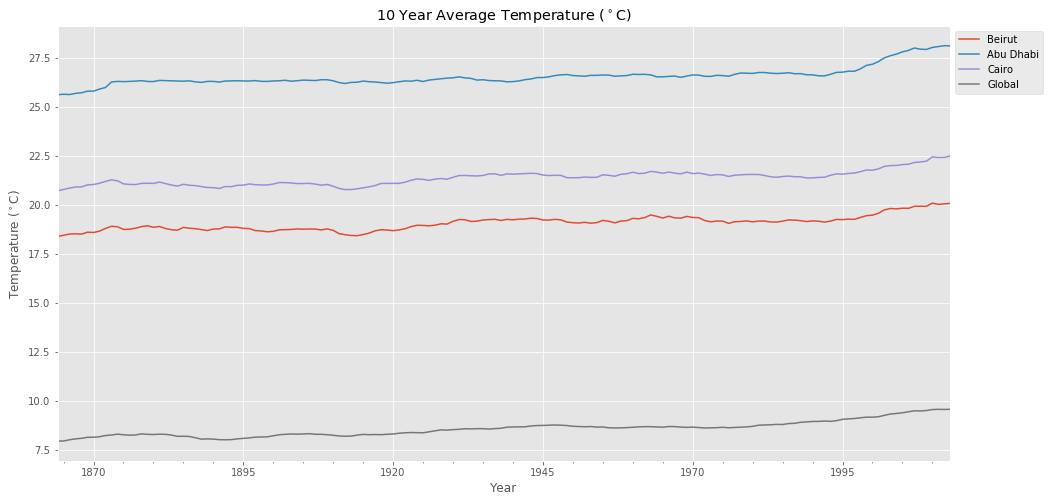

In [8]:
plt.style.use('ggplot') #Use ggplot style for better visualization
smoothed_weather_data.plot(figsize=(16,8), title='10 Year Average Temperature ($^\circ$C)') #plot data
plt.ylabel('Temperature ($^\circ$C)');plt.xlabel('Year') #Plot x & y label
plt.legend(loc='upper left',bbox_to_anchor=(1, 1)); # plot legend and improve visualization

## More Visualizations for better Inferences

### 3.1 Box Plot to compare means and other statistical properties.
### 3.2 Scatter Matrix to Compare Correlation between data.
### 3.3 Correlation Matrix Between Data to quantify the correlations.

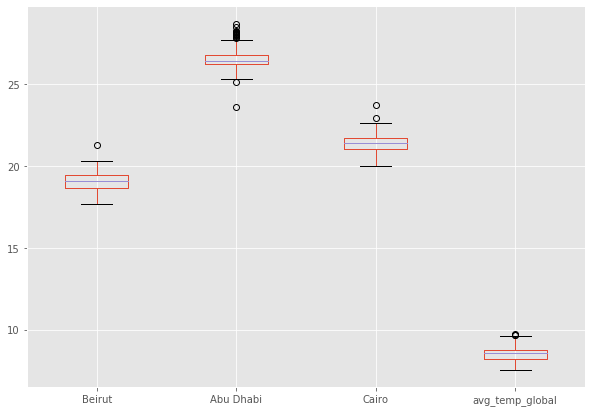

In [9]:
#Create a box plot to compare the statistical properties for each city and the global temperature
weather_data.boxplot(figsize=(10,7));

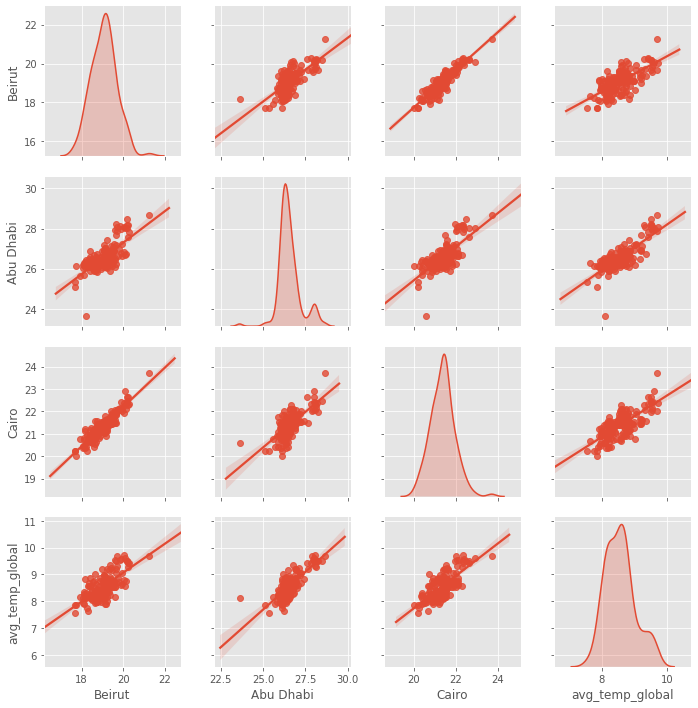

In [17]:
#create a scatter matrix to study the correlation between our data
sns.pairplot(weather_data, kind='reg', diag_kind='kde');

In [11]:
# Quantify the correlation
weather_data.corr()

city,Beirut,Abu Dhabi,Cairo,avg_temp_global
city,,,,
Beirut,1.000000,0.716909,0.921496,0.698950
Abu Dhabi,0.716909,1.000000,0.728139,0.797933
Cairo,0.921496,0.728139,1.000000,0.745830
avg_temp_global,0.698950,0.797933,0.745830,1.000000


## 4. Observations:

### a) Beirut, Abu Dhabi, and Cairo have different range of temperature values which means that there are cities that are cooler than others.
### b) An uptrend can be inferred from the 10-year moving average for the 3 Cities, as well as an uptrend for the global temperature, this means the world is facing an increase in temperature levels as time passes.
### c) From the box plot above we can infare that Abu Dhabi have the highest temperatures with some years having extreme values, Beirut and Cairo have some similar temperatures, and all the 3 cities are grater the global temperature levels.
### d) There is a medium to high positive correlation between the 3 cities and the global temperature that can be inferred from the correlation matrix and the scatter matrix plot, which means the temperatures in these 3 cities moves in sync with the global temperature.


## 4.1 To estimate the temperature in Beirut based on the global temperature we can use a Linear Regression Model

In [12]:
#import linear regression model and the scoring matrix.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
reg = LinearRegression() #Instantiate linear regression model

#fit model on training data except the last 20 observations
reg.fit(weather_data[['avg_temp_global']].iloc[:-20], weather_data[['Beirut']].iloc[:-20])

#predict the last 20 observations
predictions = reg.predict(weather_data[['avg_temp_global']].iloc[-20:])

In [14]:
print(reg.intercept_, reg.coef_) #get the regression Coefficient and the intercept to estimate the equation

[12.12456797] [[0.80795279]]


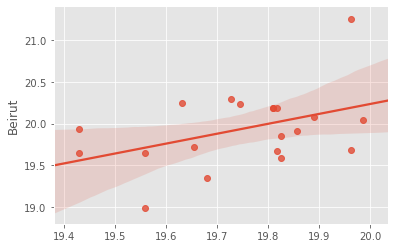

In [15]:
#scatter predicted temperatures against the actual temperatures
sns.regplot(predictions, weather_data['Beirut'].iloc[-20:]);

In [16]:
#Calculate the mean error score
rmse = np.sqrt(mean_squared_error(weather_data[['Beirut']].iloc[-20:],predictions))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 0.4475531758625629


## Conclusion:
### We can estimate the temperature in Beirut based on the Global temperature with an error +/- 0.448 Celsius Degrees Using the equation: Beirut_temperature = 12.12 + 0.81*global_temprature